# Personal Expense Tracker: Analyzing Expenditure Patterns

In today's fast-paced world, managing personal finances efficiently is paramount. Whether it's tracking daily expenses or adhering to a budget, having a system in place can significantly contribute to financial well-being.

The Personal Expense Tracker presented here offers a robust solution to monitor expenditures effectively and gain insights into spending habits.

Periodically, the tracker summarizes the user's expenses, categorizes them, and calculates the total amount spent. Additionally, it computes the remaining budget and daily budget allocation based on the user's financial goals.

To enhance data comprehension, the tracker generates graphical representations of expenditure trends.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import calendar
import datetime
import csv
import warnings
warnings.filterwarnings('ignore')

In [2]:
#expense tracker
class Expense:
    
    def __init__(self,name,category,amount) -> None:
        self.name = name
        self.category = category
        self.amount = amount
        
    def __repr__(self):
        return f"<Expense: {self.name}, {self.category}, ₹{self.amount:.2f} >"

🎯 Running Expense Tracker!
🎯 Getting User Expense
Enter expense name: paper
Enter expense amount: 50
You've entered paper,50.0
Select a category
 1. 🍔Food
 2. 🏠Home
 3. 💼Work
 4. 🎉Fun
 5. 🏍️Travel
 6. ✨Misc
Enter a category number [1 - 6]: 3
🎯 Save User Expense: <Expense: paper, 💼Work, ₹50.00 > to expenses.csv
🎯 Summarizing User Expense
<Expense: burger, 🍔Food, ₹50.00 >
<Expense: burger, 🍔Food, ₹50.00 >
<Expense: burger, 🍔Food, ₹50.00 >
<Expense: party, 🎉Fun, ₹500.00 >
<Expense: electricity, 🏠Home, ₹375.34 >
<Expense: coffe, 🍔Food, ₹15.00 >
<Expense: haircut, ✨Misc, ₹110.00 >
<Expense: juice, 🍔Food, ₹50.00 >
<Expense: elctricity, 🏠Home, ₹345.78 >
<Expense: paper, 💼Work, ₹30.00 >
<Expense: party, 🎉Fun, ₹450.00 >
<Expense: cochi, 🏍️Travel, ₹89.00 >
<Expense: cigarate, ✨Misc, ₹70.00 >
<Expense: burger, 🍔Food, ₹50.00 >
<Expense: chicken, 🍔Food, ₹287.00 >
<Expense: medicine, ✨Misc, ₹35.00 >
<Expense: bus, 🏍️Travel, ₹8.00 >
<Expense: briyani, 🍔Food, ₹200.00 >
<Expense: chiken, 🍔Food, ₹233.00

Text(0.5, 1.0, 'Contribution of Each Category to Total Amount')

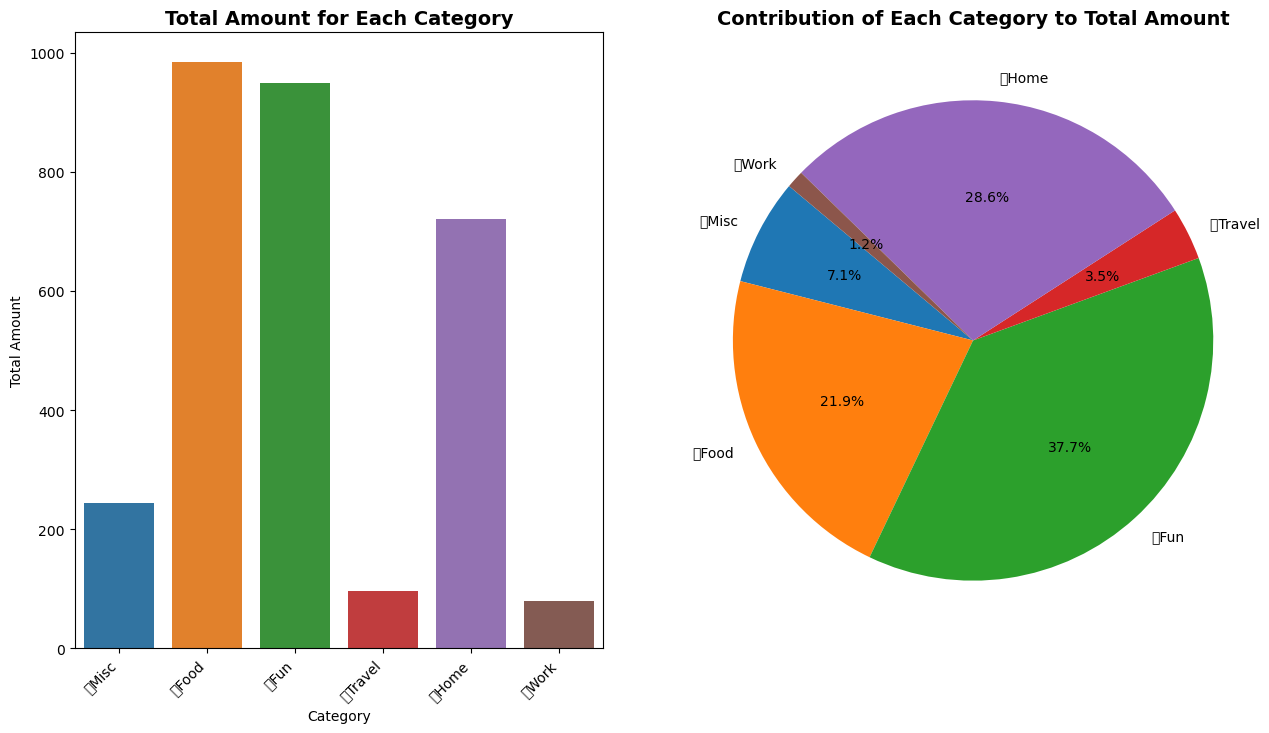

In [82]:
def main():
    print(f"🎯 Running Expense Tracker!")
    expense_file_path = "expenses.csv"
    budget =10000
    
    # Get user input for expense
    expense = get_user_expense()
    
    # Write their expense to a file
    save_expense_to_file(expense,expense_file_path)
    
    # Read file and summarize expenses
    summarize_expenses(expense_file_path,budget)

def get_user_expense():
    print(f"🎯 Getting User Expense")
    expense_name = input("Enter expense name: ")
    expense_amount = float(input("Enter expense amount: "))
    print(f"You've entered {expense_name},{expense_amount}")
    
    expense_categories = [
                              "🍔Food",
                              "🏠Home",
                              "💼Work",
                              "🎉Fun",
                              "🏍️Travel",
                              "✨Misc" 
                                          ]
    while True:
        print("Select a category")
        for i, category_name in enumerate(expense_categories):
            print(f" {i+1}. {category_name}")
            
        value_range = f"[1 - {len(expense_categories)}]"
        selected_index = int(input(f"Enter a category number {value_range}: ")) - 1
            
        if i in range(len(expense_categories)):
            selected_category = expense_categories[selected_index]
            new_expense = Expense(
                name=expense_name,category=selected_category,amount=expense_amount
            )
            return new_expense
        else:
            print("Invalid category. please try again!")
                
            

def save_expense_to_file(expense: Expense,expense_file_path):
    print(f"🎯 Save User Expense: {expense} to {expense_file_path}")
    with open(expense_file_path, "a") as f:
        f.write(f"{expense.name},{expense.amount},{expense.category}\n")

def summarize_expenses(expense_file_path,budget):
    print(f"🎯 Summarizing User Expense")
    expenses: list[Expense] = []
    with open(expense_file_path,"r") as f:
        lines = f.readlines()
        for line in lines:
            expense_name, expense_amount, expense_categories = line.strip().split(",")
            line_expense = Expense(
                name = expense_name, 
                amount = float(expense_amount),
                category = expense_categories
            )
            print(line_expense)
            expenses.append(line_expense)
#     print(expenses)
    
    amount_by_category = {}
    for expense in expenses:
        key = expense.category
        if key in amount_by_category:
            amount_by_category[key] += expense.amount
        else:
            amount_by_category[key] = expense.amount
            
    for key, amount in amount_by_category.items():
        print(f" {key}: ₹{amount:.2f}")
        
    total_spent = sum([x.amount for x in expenses])
    print(f"You've spent ₹{total_spent:.2f} this month")
    
    remaining_budget = budget - total_spent
    print(f"✅ Budget Remaining: ₹{remaining_budget:.2f}")
    
    now = datetime.datetime.now()
    days_in_month = calendar.monthrange(now.year, now.month)[1]
    remaining_days = days_in_month - now.day
    print("🗓️Remaining days in the current month:", remaining_days)
    
    daily_budget = remaining_budget / remaining_days
    print(green(f"👉 Budget Per Day: ₹{daily_budget:.2f}"))

def green(text):
    return f"\033[92m{text}\033[0m"

if __name__ == "__main__":
    main()
# Creating barchart and pie chart
df = pd.read_csv('expenses.csv')
df.to_csv('expenses_new.csv', index=False)
df_new=pd.read_csv('expenses_new.csv')
columns = ["Expense", "Amount", "Category"]
df_new = pd.read_csv('expenses_new.csv', names=columns)

df_new.drop(columns=['Expense'],inplace=True)

category_sums = df_new.groupby("Category")["Amount"].sum()

graph = category_sums.reset_index()


graph.columns = ["Category", "Total Amount"]

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)  
sns.barplot(data=graph, x='Category', y='Total Amount')
plt.title("Total Amount for Each Category", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha="right") 


plt.subplot(1, 2, 2) 
plt.pie(category_sums_df["Total Amount"], labels=category_sums_df["Category"], autopct='%1.1f%%' ,startangle=140)
plt.axis('equal') 
plt.title("Contribution of Each Category to Total Amount", fontsize=14, fontweight='bold')
    

Conclusion:

The Personal Expense Tracker is a valuable tool for individuals seeking to take control of their finances. By leveraging its features, users can develop a deeper understanding of their spending habits, adhere to budgets, and work towards financial stability and prosperity. Whether managing day-to-day expenses or planning for future financial goals, the tracker serves as a reliable companion on the journey towards financial well-being.